In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from matplotlib.ticker import FuncFormatter 
#This will be used to create the pre planned events icon
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox) 
from matplotlib._png import read_png 
from matplotlib.patches import Ellipse
import matplotlib.mlab as mlab
%matplotlib inline
import plotly.plotly as py
import seaborn as sns
import xml.etree.ElementTree as ET
import geopy.distance
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import datetime
import time 
import folium
from folium import plugins
sns.set()
pal = sns.hls_palette(10, h=.5)
sns.set_palette(pal)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
from matplotlib.ticker import FuncFormatter 
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox) 
from matplotlib._png import read_png
from matplotlib.patches import Ellipse
import matplotlib.mlab as mlab
import plotly.plotly as py

import networkx as nx
try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
    except ImportError:
        raise ImportError("import failed")

In [2]:
path ='Datasets/Trips_Data/2017TripsData'

trips_2017 = glob.glob(path + "/*.csv")
trips_data_frame = pd.DataFrame()
columns_name = ['rental_id','duration','bike_id','end_date','end_station_id','end_station_name','start_date',
             'start_station_id','start_station_name']
data_frame_lists = []

columns=list(range(9))
for read_trip in trips_2017:
    
    data_frame = pd.read_csv(read_trip,names=columns_name,usecols=columns,header=0, engine='python',
                     parse_dates=['start_date'],dayfirst=True,infer_datetime_format=True)
    data_frame_lists.append(data_frame)
trips_data_frame=pd.concat(data_frame_lists,ignore_index=True)
trips_data_frame = trips_data_frame.dropna(axis=0, how='any')
trips_data_frame = trips_data_frame.reset_index(drop=True)
trips_data_frame['hour'] = trips_data_frame['start_date'].dt.hour
trips_data_frame['day'] = trips_data_frame['start_date'].dt.day
trips_data_frame['month'] = trips_data_frame['start_date'].dt.month
trips_data_frame['year'] = trips_data_frame['start_date'].dt.year
trips_data_frame['quarter'] = trips_data_frame['start_date'].dt.quarter
trips_data_frame['day_of_week'] = trips_data_frame['start_date'].dt.dayofweek
trips_data_frame['weekday'] = trips_data_frame['start_date'].dt.weekday
trips_data_frame.head(12)


,rental_id,duration,bike_id,end_date,end_station_id,end_station_name,start_date,start_station_id,start_station_name,hour,day,month,year,quarter,day_of_week,weekday
0,71414840,780.0000,6324.0000,16/11/2017 17:49,173.0000,"Waterloo Road, South Bank",2017-11-16 17:36:00,199,"Great Tower Street, Monument",17,16,11,2017,4,3,3
1,71364210,300.0000,15155.0000,15/11/2017 08:08,24.0000,"British Museum, Bloomsbury",2017-11-15 08:03:00,65,"Gower Place , Euston",8,15,11,2017,4,2,2
2,71458500,720.0000,9436.0000,18/11/2017 10:49,206.0000,"New Road 1 , Whitechapel",2017-11-18 10:37:00,565,"Selby Street, Whitechapel",10,18,11,2017,4,5,5
3,71521376,1320.0000,5151.0000,21/11/2017 09:05,359.0000,"Butler Place, Westminster",2017-11-21 08:43:00,701,"Vicarage Crescent, Battersea",8,21,11,2017,4,1,1
4,71489373,780.0000,1270.0000,20/11/2017 07:55,610.0000,"Danvers Street, West Chelsea",2017-11-20 07:42:00,665,"Smugglers Way, Wandsworth",7,20,11,2017,4,0,0
5,71455551,360.0000,7066.0000,18/11/2017 02:49,24.0000,"British Museum, Bloomsbury",2017-11-18 02:43:00,214,"Endsleigh Gardens, Euston",2,18,11,2017,4,5,5
6,71474318,1200.0000,11946.0000,19/11/2017 12:52,356.0000,"South Kensington Station, South Kensington",2017-11-19 12:32:00,616,"Aintree Street, Fulham",12,19,11,2017,4,6,6
7,71493455,480.0000,13205.0000,20/11/2017 08:57,24.0000,"British Museum, Bloomsbury",2017-11-20 08:49:00,14,"Belgrove Street , King's Cross",8,20,11,2017,4,0,0
8,71437069,300.0000,8645.0000,17/11/2017 12:24,88.0000,"Bayley Street , Bloomsbury",2017-11-17 12:19:00,116,"Little Argyll Street, West End",12,17,11,2017,4,4,4
9,71362314,1560.0000,9720.0000,15/11/2017 07:50,556.0000,"Heron Quays DLR, Canary Wharf",2017-11-15 07:24:00,314,"Tyers Gate, Bermondsey",7,15,11,2017,4,2,2


In [3]:
times = time.time()
trips_data_frame['ride_date'] = pd.Series(map(lambda x: x.astype('datetime64[D]'), trips_data_frame['start_date'].values))
time.time() - times

28.837424993515015

In [4]:
trips_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10188167 entries, 0 to 10188166
Data columns (total 17 columns):
rental_id             int64
duration              float64
bike_id               float64
end_date              object
end_station_id        float64
end_station_name      object
start_date            datetime64[ns]
start_station_id      int64
start_station_name    object
hour                  int64
day                   int64
month                 int64
year                  int64
quarter               int64
day_of_week           int64
weekday               int64
ride_date             datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(9), object(3)
memory usage: 1.3+ GB


In [5]:
def thousands_format(x, pos):
    return '{:.0f}{}'.format(x * 1e-3, 'K')

In [6]:
groupByDate = trips_data_frame.groupby('ride_date')['rental_id'].count()
groupByDate.head()

ride_date
2016-12-28    12428
2016-12-29    14051
2016-12-30    11565
2016-12-31    11424
2017-01-01    12842
Name: rental_id, dtype: int64

In [7]:
groupByDate['2017-03-01':'2017-03-30']

ride_date
2017-03-01    24586
2017-03-02    26748
2017-03-03    22712
2017-03-04    21293
2017-03-05    10545
2017-03-06    26693
2017-03-07    28914
2017-03-08    24347
2017-03-09    30914
2017-03-10    27838
2017-03-11    30148
2017-03-12    15715
2017-03-13    31977
2017-03-14    30578
2017-03-22    23583
2017-03-23    27453
2017-03-24    27330
2017-03-25    27963
2017-03-26    23822
2017-03-27    30662
2017-03-28    32048
2017-03-29    29759
2017-03-30    33898
Name: rental_id, dtype: int64

<Figure size 432x288 with 0 Axes>

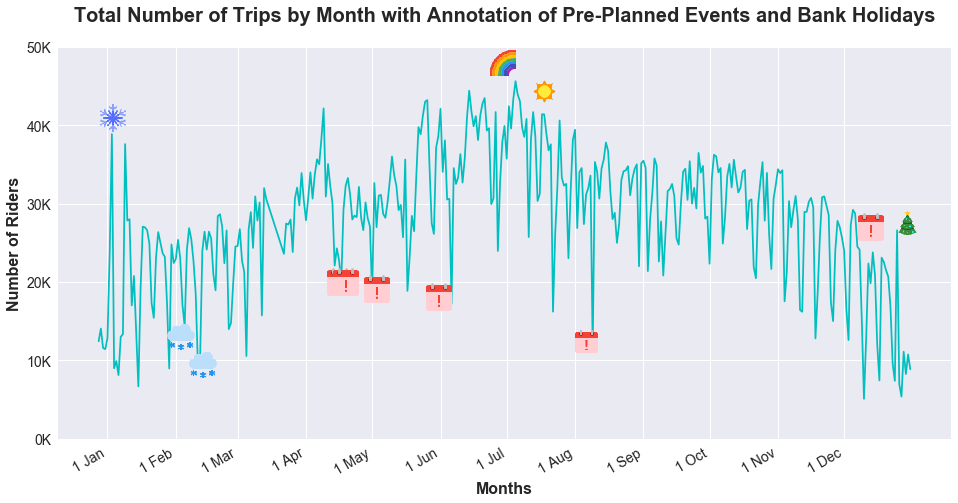

In [8]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(15,8))
ax = groupByDate.plot(figsize = (16, 8), fontsize = 12, ylim  = (1000, 50000), color = 'c')

formatter = FuncFormatter(thousands_format)
ax.yaxis.set_major_formatter(formatter)
gap = ax.title
gap.set_position([.5, 1.05])
plt.title('Total Number of Trips by Month with Annotation of Pre-Planned Events and Bank Holidays', fontsize=20, fontweight='bold')
plt.tick_params(labelsize=14)
plt.xticks(['2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11', '2017-12'], ['1 Jan', '1 Feb', '1 Mar','1 Apr', '1 May', '1 Jun','1 Jul', '1 Aug', '1 Sep','1 Oct','1 Nov','1 Dec','31 Dec']);
 
ax.set_ylim([0,50000]),

image1 = read_png('Datasets/icons/Leave.png')
image2 = read_png('Datasets/icons/Winter.png')
image3 = read_png('Datasets/icons/Snow.png')
image4 = read_png('Datasets/icons/Summer.png')
image5 = read_png('Datasets/icons/Rainbow.png')
image6 = read_png('Datasets/icons/Christmas.png')
imagebox = OffsetImage(image2, zoom=0.7) 
xy = ['2017-01-01', 40000] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., 7.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)
imagebox = OffsetImage(image3, zoom=0.7) 
xy = ['2017-02-01', 12000] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., 7.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)
imagebox = OffsetImage(image3, zoom=0.7) 
xy = ['2017-02-11',8500] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., 7.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)
imagebox = OffsetImage(image1, zoom=0.7) 
xy = ['2017-04-14', 19000] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., 7.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

imagebox = OffsetImage(image1, zoom=0.7) 
xy = ['2017-04-17', 19000] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., 7.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)
imagebox = OffsetImage(image1, zoom=0.7) 
xy = ['2017-05-01', 18000] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., 7.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

imagebox = OffsetImage(image1, zoom=0.7) 
xy = ['2017-05-29', 17000] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., 7.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

imagebox = OffsetImage(image5, zoom=0.7) 
xy = ['2017-06-27', 47000] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., 7.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

imagebox = OffsetImage(image4, zoom=0.6) 
xy = ['2017-07-10', 44000] 
ab = AnnotationBbox(imagebox, xy, xybox=(18., 2.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)


imagebox = OffsetImage(image1, zoom=0.6)
xy = ['2017-07-27', 11000] 
ab = AnnotationBbox(imagebox, xy, xybox=(22., 10.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False) #padding around the image
ax.add_artist(ab)

imagebox = OffsetImage(image1, zoom=0.7) 
xy = ['2017-12-11', 26000] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., 7.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)
imagebox = OffsetImage(image6, zoom=0.6) 
xy = ['2017-12-25', 27000] 
ab = AnnotationBbox(imagebox, xy, xybox=(10., 5.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

plt.xlabel('Months', fontsize=16, fontweight='bold')
plt.ylabel('Number of Riders', fontsize=16, fontweight='bold')
plt.show()

In [9]:
def millions_format(x, pos):
    return '{:.01f}{}'.format(x * 1e-6, 'M') 


In [10]:
def thousands_format(x, pos):
    return '{:.0f}{}'.format(x * 1e-3, 'K')

In [11]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

Text(0,0.5,'Number of Riders')

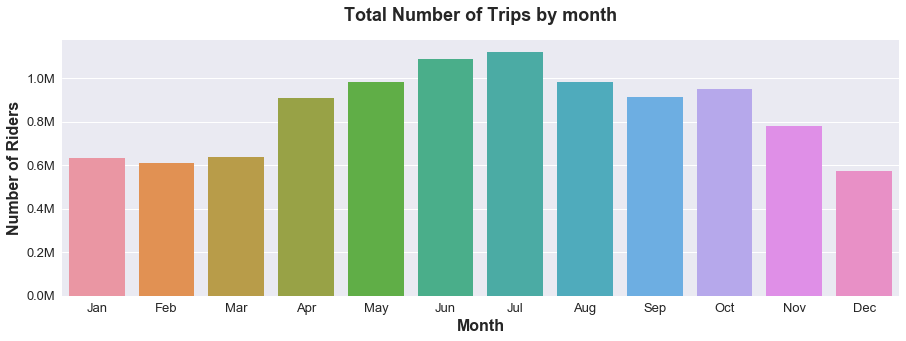

In [12]:
fig = plt.figure(figsize = (15,16))
formatter = FuncFormatter(millions_format)
plt.subplot(3,1,3)
axes3 = sns.countplot(trips_data_frame.month)
axes3.set_xticklabels(months)
axes3.yaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=13)
gap = axes3.title
gap.set_position([.5, 1.05])
plt.title('Total Number of Trips by month', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=16, fontweight='bold')
plt.ylabel('Number of Riders', fontsize=16, fontweight='bold')

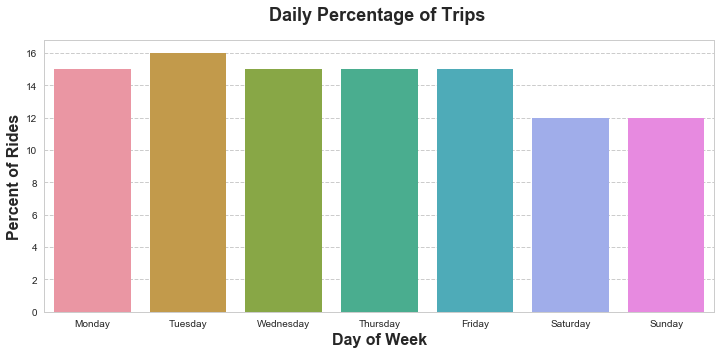

In [13]:
daily_rides= trips_data_frame[['start_date','day_of_week']].groupby(['day_of_week']).size().reset_index(name='rides')
daily_rides['Percent of Rides']=round(daily_rides['rides']/trips_data_frame.shape[0]*100)
weeksDay={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
daily_rides['Day of Week'] = daily_rides['day_of_week'].map(weeksDay)
sns.set(style='ticks',color_codes=False)
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize=(12,5))
axes = sns.barplot(x="Day of Week",y="Percent of Rides",data=daily_rides)
plt.grid( which='major', axis='y', linestyle='--')
gap = axes.title
gap.set_position([.5, 1.05])
plt.title('Daily Percentage of Trips ', fontsize=18, fontweight='bold')
plt.xlabel('Day of Week', fontsize=16, fontweight='bold')
plt.ylabel('Percent of Rides', fontsize=16, fontweight='bold')
axes.yaxis.grid(True);

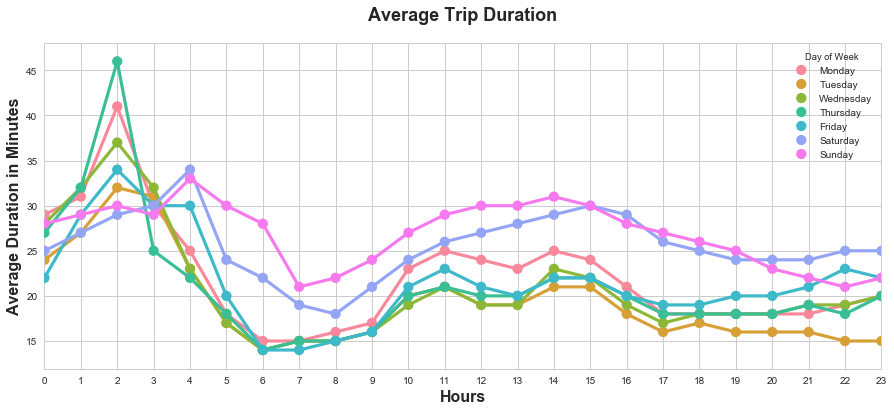

In [14]:
duration= trips_data_frame[['duration','hour','day_of_week']].groupby(['hour','day_of_week'])['duration'].mean().reset_index(name='avg_duration')
duration['avg_duration'] = round(duration['avg_duration']/60)
duration['Day of Week'] = duration['day_of_week'].map(weeksDay)
fig, axes = plt.subplots(figsize=(15,6))

axes = sns.pointplot(x="hour", y="avg_duration", hue="Day of Week",data=duration)
axes.set_xlim([0,23])
gap = axes.title
gap.set_position([.5, 1.05])
plt.title('Average Trip Duration', fontsize=18, fontweight='bold')
plt.xlabel('Hours', fontsize=16, fontweight='bold')
plt.ylabel('Average Duration in Minutes', fontsize=16, fontweight='bold')
axes.grid(True);

In [15]:
df_plt3 = trips_data_frame.pivot_table('rental_id', aggfunc='count', index='start_station_name', columns='end_station_name')
df_plt3.shape

(794, 795)

In [16]:
 
from scipy import stats
from scipy.stats import skew, kurtosis
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import scipy.stats as st
import sklearn
from sklearn import metrics, model_selection
corrmat = df_plt3.corr('spearman')

Text(0,0.5,'Number of Riders')

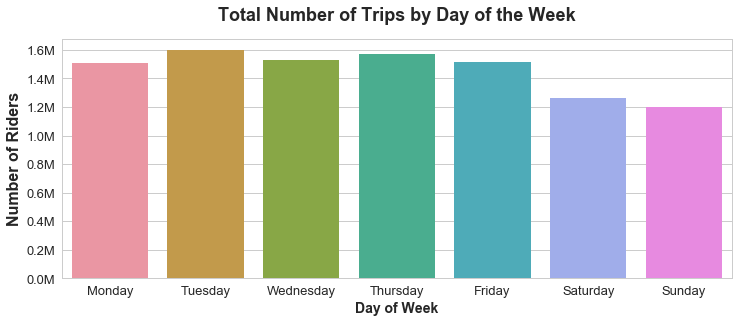

In [17]:
fig = plt.figure(figsize = (12,15))
formatter = FuncFormatter(millions_format)
plt.subplot(3,1,2)
axes2 = sns.countplot(trips_data_frame.weekday, order = range(7))
axes2.set_xticklabels(weekdays)
axes2.yaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=13)
gap = axes2.title
gap.set_position([.5, 1.05])
plt.title('Total Number of Trips by Day of the Week', fontsize=18, fontweight='bold')
plt.xlabel('Day of Week', fontsize=14, fontweight='bold')
plt.ylabel('Number of Riders', fontsize=16, fontweight='bold')



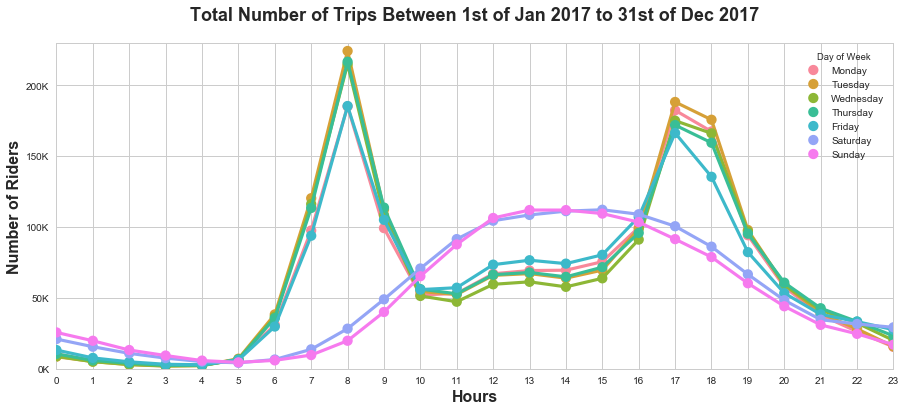

In [18]:
formatter = FuncFormatter(thousands_format)
hourly_rides= trips_data_frame[['start_date','hour','day_of_week']].groupby(['hour','day_of_week']).size().reset_index(name='rides')
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
hourly_rides['Day of Week'] = hourly_rides['day_of_week'].map(dayOfWeek)
fig, axes = plt.subplots(figsize=(15,6))
axes = sns.pointplot(x="hour", y="rides", hue="Day of Week",data=hourly_rides)
axes.yaxis.set_major_formatter(formatter)
gap = axes.title
gap.set_position([.5, 1.05])
axes.set_ylim([0,230000]),axes.set_xlim([0,23]),axes.set_xlabel('Hours', fontsize=16, fontweight='bold'), axes.set_ylabel('Number of Riders', fontsize=16, fontweight='bold')
plt.title('Total Number of Trips Between 1st of Jan 2017 to 31st of Dec 2017', fontsize=18, fontweight='bold')
 
axes.grid(True);



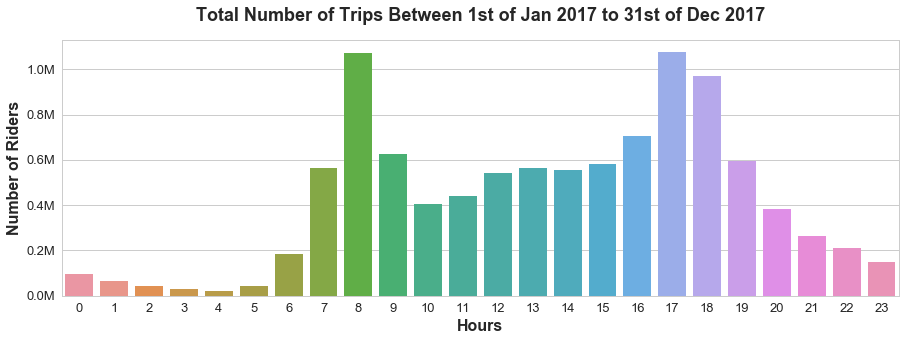

In [19]:
fig = plt.figure(figsize = (15,16))
formatter = FuncFormatter(millions_format)

plt.subplot(3,1,1) 
axes1 = sns.countplot(trips_data_frame.hour, order = range(24))
axes1.yaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=13)
gap = axes1.title
gap.set_position([.5, 1.05])
plt.title('Total Number of Trips Between 1st of Jan 2017 to 31st of Dec 2017', fontsize=18, fontweight='bold')
plt.xlabel('Hours', fontsize=16, fontweight='bold')
plt.ylabel('Number of Riders', fontsize=16, fontweight='bold')

plt.show()

In [20]:
print ("Total trips in 2017: {:,}".format(trips_data_frame.shape[0]))
print("Average trip duration in 2017: "+str(round(trips_data_frame['duration'].mean()/60))+" minutes")
df_stations = pd.concat([trips_data_frame['end_station_name'],trips_data_frame['start_station_name']])
print("Total number of unique docking stations: "+str(df_stations.nunique()))
print("Total number of unique bikes in operation: {:,}".format((trips_data_frame['bike_id'].nunique())))

Total trips in 2017: 10,188,167
Average trip duration in 2017: 20 minutes
Total number of unique docking stations: 795
Total number of unique bikes in operation: 13,122


In [21]:
trips_poplar = pd.DataFrame()
trips_poplar = trips_data_frame.groupby(['end_station_name', 'start_station_name']).size().reset_index(name = 'Total_rides')
trips_poplar = trips_poplar.sort_values('Total_rides', ascending = False)
trips_poplar['start_station_name'] = trips_poplar['start_station_name'].astype(str)
trips_poplar['end_station_name'] = trips_poplar['end_station_name'].astype(str)
trips_poplar = trips_poplar[:20]
trips_poplar = trips_poplar.reset_index()
trips_poplar.head()

,index,end_station_name,start_station_name,Total_rides
0,173853,"Hyde Park Corner, Hyde Park","Hyde Park Corner, Hyde Park",23775
1,13838,"Aquatic Centre, Queen Elizabeth Olympic Park","Aquatic Centre, Queen Elizabeth Olympic Park",15411
2,6525,"Albert Gate, Hyde Park","Albert Gate, Hyde Park",12257
3,37945,"Black Lion Gate, Kensington Gardens","Black Lion Gate, Kensington Gardens",12195
4,338835,"Triangle Car Park, Hyde Park","Triangle Car Park, Hyde Park",11005


In [32]:
data = open('Datasets/stations.xml').read()
xml_root = ET.XML(data) 
all_stations = []
for i, child_node in enumerate(xml_root):
    stations = {}
    for child in child_node:
        stations[child.tag] = child.text
    all_stations.append(stations)
stations = pd.DataFrame(all_stations)
stations2 = pd.DataFrame(all_stations)
stations['coords'] = list(zip(stations.lat, stations.long))
stations = stations[['id','name','coords']]

In [33]:
stations.head()

,id,name,coords
0,1,"River Street , Clerkenwell","(51.52916347, -0.109970527)"
1,2,"Phillimore Gardens, Kensington","(51.49960695, -0.197574246)"
2,3,"Christopher Street, Liverpool Street","(51.52128377, -0.084605692)"
3,4,"St. Chad's Street, King's Cross","(51.53005939, -0.120973687)"
4,5,"Sedding Street, Sloane Square","(51.49313, -0.156876)"


In [34]:
count_stations = trips_data_frame.groupby(['start_station_name','end_station_name']).size().reset_index(name='rides')
stations_rides_network = pd.merge(count_stations, stations, how='inner', left_on=['start_station_name'], right_on=['name'])
stations_rides_network = pd.merge(stations_rides_network, stations, how='inner', left_on=['end_station_name'], right_on=['name'])
stations_rides_network = stations_rides_network[['start_station_name','end_station_name','rides','coords_x','coords_y']]
stations_rides_network['distribution'] = stations_rides_network.apply(lambda row: geopy.distance.vincenty(row['coords_x'], row['coords_y']).miles, axis=1)
stations_rides_network.head()

,start_station_name,end_station_name,rides,coords_x,coords_y,distribution
0,"Abbey Orchard Street, Westminster","Abbey Orchard Street, Westminster",292,"(51.49812559, -0.132102166)","(51.49812559, -0.132102166)",0.0000
1,"Aberdeen Place, St. John's Wood","Abbey Orchard Street, Westminster",5,"(51.524826, -0.176268)","(51.49812559, -0.132102166)",2.6527
2,"Aberfeldy Street, Poplar","Abbey Orchard Street, Westminster",1,"(51.513548, -0.005659)","(51.49812559, -0.132102166)",5.5583
3,"Abingdon Green, Westminster","Abbey Orchard Street, Westminster",64,"(51.497622, -0.125978)","(51.49812559, -0.132102166)",0.2665
4,"Abingdon Villas, Kensington","Abbey Orchard Street, Westminster",2,"(51.4973875, -0.197245586)","(51.49812559, -0.132102166)",2.8114


In [35]:
network = nx.Graph()

count_stations1 = count_stations.loc[count_stations['rides']>=25]
for index, row in count_stations1.iterrows():
    network.add_edge(row['start_station_name'], row['end_station_name'])

In [36]:
network = nx.Graph()
limit_stations = count_stations.loc[count_stations['rides'] >= 201]
limit_stations['rides'] = limit_stations['rides'].clip(upper=2500)
for index, row in limit_stations.iterrows():
    network.add_edge(row['start_station_name'], row['end_station_name'],weight=row['rides'])
remove = [node for node,degree in network.degree() if degree <=30]
network.remove_nodes_from(remove)
remove = [node for node,degree in network.degree() if degree <=2]
network.remove_nodes_from(remove)

Text(0.5,1,'Bike Networks')

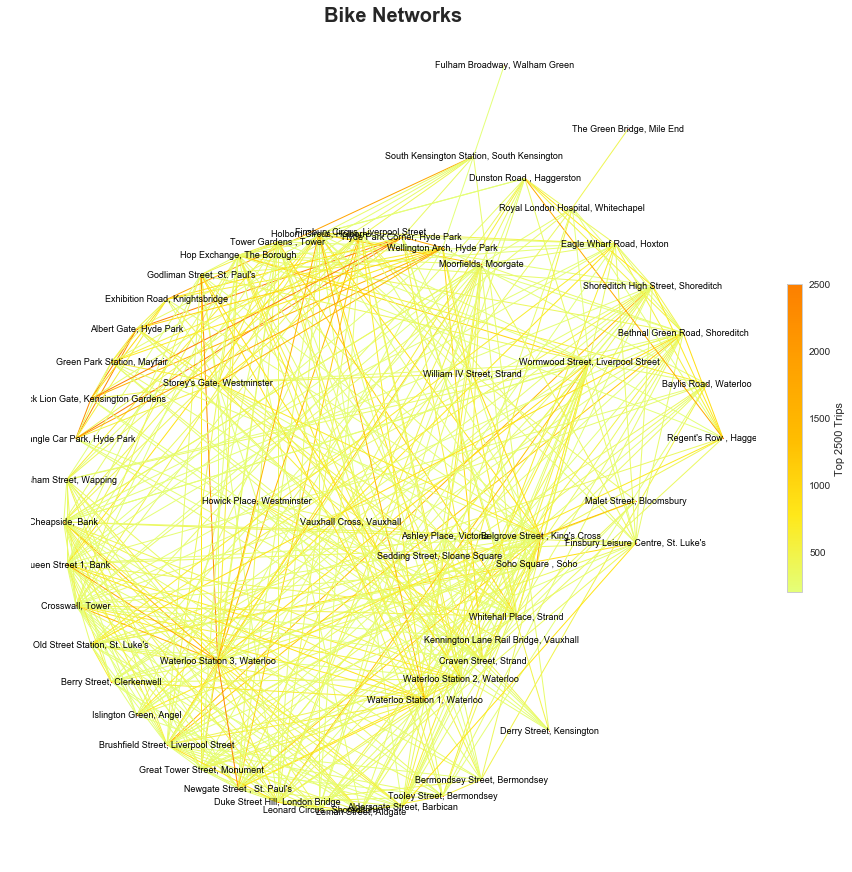

In [37]:
plt.subplots(figsize=(12,12))
edges,weights = zip(*nx.get_edge_attributes(network,'weight').items())
pos = graphviz_layout(network, prog="twopi")
nx.draw(network, pos, node_color='red',node_size=0.4, edgelist=edges, edge_color=weights, width=1, edge_cmap=plt.cm.Wistia)
nx.draw_networkx_labels(network,pos=pos,font_size=9)
sm = plt.cm.ScalarMappable(cmap=plt.cm.Wistia)
sm._A = []
sm.set_clim(min(weights), max(weights))
cbar = plt.colorbar(sm,fraction=0.02, pad=0.04)
cbar.set_label('Top 2500 Trips')
plt.tight_layout();
plt.title('Bike Networks', fontsize=20, fontweight='bold')

In [38]:
trips_poplar.columns

Index(['index', 'end_station_name', 'start_station_name', 'Total_rides'], dtype='object')

In [39]:
world_map = ["Stamen Terrain", "Stamen Toner", "Mapbox Bright"]
map_world = folium.Map(location=[51.5074, 0.1278],
                        tiles = "Stamen Terrain",
                        zoom_start = 12)
map_world


In [40]:
 stations.head()

,id,name,coords
0,1,"River Street , Clerkenwell","(51.52916347, -0.109970527)"
1,2,"Phillimore Gardens, Kensington","(51.49960695, -0.197574246)"
2,3,"Christopher Street, Liverpool Street","(51.52128377, -0.084605692)"
3,4,"St. Chad's Street, King's Cross","(51.53005939, -0.120973687)"
4,5,"Sedding Street, Sloane Square","(51.49313, -0.156876)"


In [41]:
stations2[['lat','long']] = stations2[['lat','long']].apply(pd.to_numeric)

In [42]:
stations2.head()


,id,installDate,installed,lat,locked,long,name,nbBikes,nbDocks,nbEmptyDocks,removalDate,temporary,terminalName
0,1,1278947280000,true,51.5292,false,-0.1100,"River Street , Clerkenwell",15,19,4,None,false,001023
1,2,1278585780000,true,51.4996,false,-0.1976,"Phillimore Gardens, Kensington",33,37,3,None,false,001018
2,3,1278240360000,true,51.5213,false,-0.0846,"Christopher Street, Liverpool Street",21,32,9,None,false,001012
3,4,1278241080000,true,51.5301,false,-0.1210,"St. Chad's Street, King's Cross",16,23,7,None,false,001013
4,5,1278241440000,true,51.4931,false,-0.1569,"Sedding Street, Sloane Square",8,27,19,None,false,003420


In [43]:
locations = stations2[['lat', 'long']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[117]

[51.52111369, -0.078869751]

In [44]:
len(locationlist)

772

In [45]:
world_map = folium.Map(location=[51.52, -0.17], zoom_start=12)
for coord in range(0, len(locationlist)):
    folium.Marker(locationlist[coord], popup=stations2['terminalName'][coord]).add_to(world_map)
world_map

In [46]:
stations2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 13 columns):
id              772 non-null object
installDate     691 non-null object
installed       772 non-null object
lat             772 non-null float64
locked          772 non-null object
long            772 non-null float64
name            772 non-null object
nbBikes         772 non-null object
nbDocks         772 non-null object
nbEmptyDocks    772 non-null object
removalDate     3 non-null object
temporary       772 non-null object
terminalName    772 non-null object
dtypes: float64(2), object(11)
memory usage: 78.5+ KB


In [47]:
stations_count = trips_data_frame.groupby(['start_station_name','end_station_name']).size().reset_index(name='rides')
stations_rides_network1 = pd.merge(stations_count, stations2, how='inner', left_on=['start_station_name'], right_on=['name'])
stations_rides_network1 = pd.merge(stations_rides_network, stations2, how='inner', left_on=['end_station_name'], right_on=['name'])


In [50]:
map = folium.Map([51.54, -0.078], zoom_start=12)

for index, row in stations2.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=3,
                        popup=row['terminalName'],
                        fill_color="#e43d53",
                       ).add_to(map)

In [51]:
station_list = stations2[['lat', 'long']].as_matrix()


map.add_children(plugins.HeatMap(station_list, radius=30))
map